In [1]:
%matplotlib inline

In [2]:
import numpy as np
import numpy.linalg as la
import scipy.misc as misc
import matplotlib.pyplot as plt

import spherepix.image as image
import spherepix.geometry as sgeom
import spherepix.pixelation as pixelation
import spherepix.springdynamics as springs
import spherepix.camera as cam
from spherepix.plot import plot as splot

# Perspective camera

Intrinsic matrix:
[[ 698.90625       0.          319.5       ]
 [   0.          698.54168701  239.5       ]
 [   0.            0.            1.        ]]


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


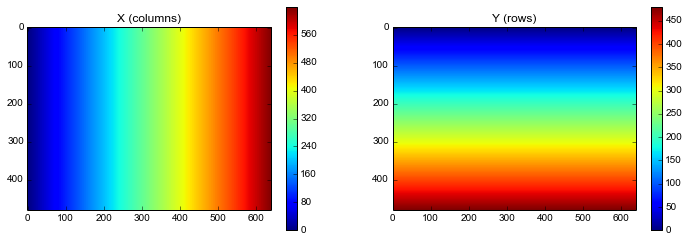

In [3]:
imsize = (480, 640)    # image resolution (rows, columns)
ssize = (24, 32)       # sensor size (mm)
flength = 35           # focal length (mm)

# Pinhole camera object
pcam = cam.PinholeCamera(flength, imsize, ssize)
print('Intrinsic matrix:\n{0}'.format(pcam.intrinsics))

# surfCoords are the 3D coordinates (x, y, z) of each point of the camera image plane
surfCoords = pcam.surfaceCoordinates()

# sphereCoords are the 3D coordinates (x, y, z) of each point of the camera image plane mapped to the unit sphere.
# They are computed by normalizing surfCoords to norm 1.
sphereCoords = pcam.sphericalCoordinates()

# pixel coordinates
XX, YY = np.meshgrid(range(640), range(480))
plt.figure(figsize=(12, 4))
plt.subplot2grid((1, 2), (0, 0)); plt.imshow(XX); plt.colorbar(); plt.title('X (columns)')
plt.subplot2grid((1, 2), (0, 1)); plt.imshow(YY); plt.colorbar(); plt.title('Y (rows)')
plt.show()

# Camera image plane and spherical coordinates

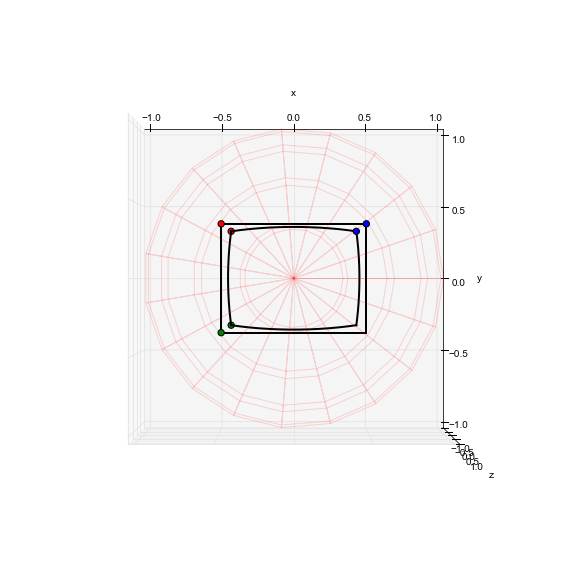

In [4]:
fig, ax = splot.createFigure(elev=90)
splot.addSphere(ax)
splot.plotContour(ax, surfCoords)
splot.plotContour(ax, sphereCoords)
ax.set_ylim(-1, 1); ax.set_xlim(-1, 1); ax.set_zlim(-1, 1)
plt.show()

# Coordinate casting

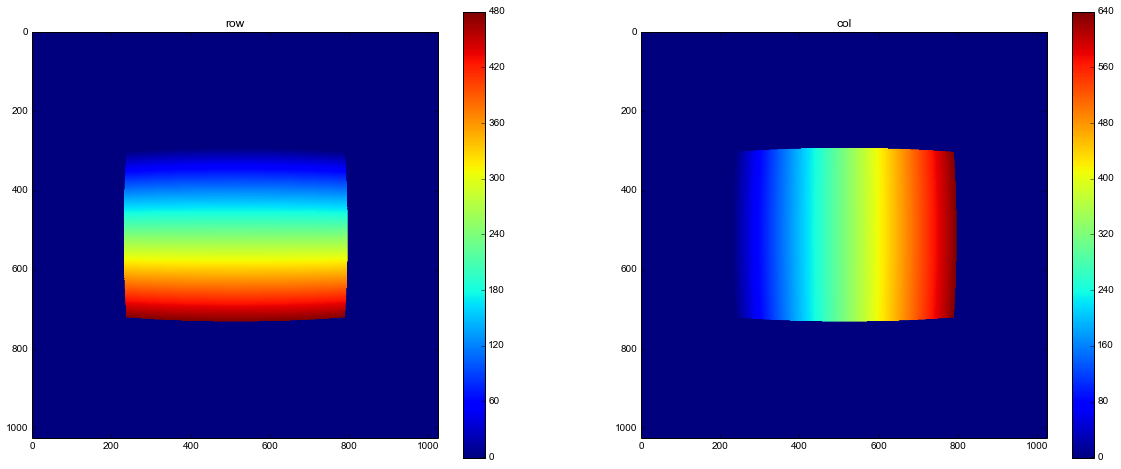

In [5]:
# load the pixelation
pix = pixelation.loadPixelation('../pixelations/M1_1024/pix.json')

# coordinates of the top face
etas = pix.faceCoordinates(5)
scoords = pcam.sphericalCoordinates()

# cast the camera image plane coordinates onto the spherepix face
# betas[..., 1] = row coordinates
# betas[..., 0] = column coordinates
betas = pixelation.castCoordinates(etas, scoords)

plt.figure(figsize=(20, 8))
plt.subplot2grid((1,2), (0,0)); plt.imshow(betas[:,:,1]); plt.colorbar(); plt.title('row')
plt.subplot2grid((1,2), (0,1)); plt.imshow(betas[:,:,0]); plt.colorbar(); plt.title('col')
plt.show()

# Image mapping

The code below maps an image taken using the perspective camera defined by the intrinsic parameters above and map it to the spherepix face.

Once the image is mapped, standard image operations such as filtering or image gradient can be applied directly to the mapped image and can be interpreted as quantities on the sphere.

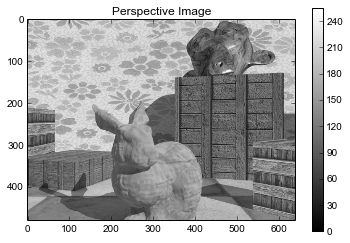

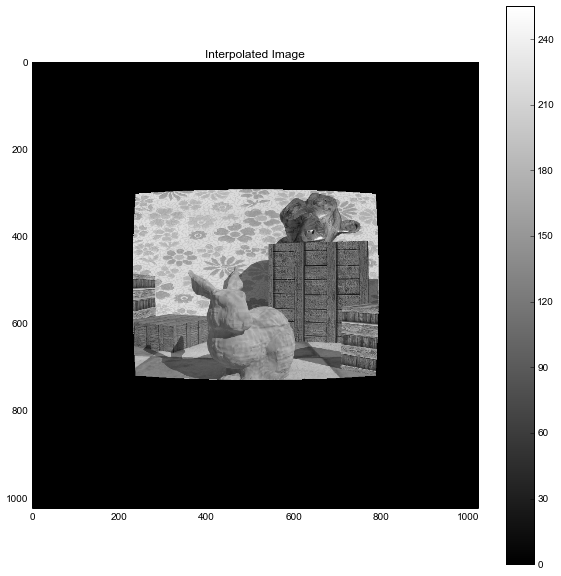

In [6]:
img = misc.imread('../images/bunny/0150.jpg', flatten=True).astype(np.float32)
plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=255); plt.colorbar(); plt.title('Perspective Image')
plt.show()

cshape = (betas.shape[0], betas.shape[1], img.shape[2]) if img.ndim == 3 else (betas.shape[0], betas.shape[1])
imgcast = np.zeros(cshape, dtype=np.float32)

image.interpolateImage(img, betas, imgcast)

plt.figure(figsize=(10, 10))
plt.imshow(imgcast[:,:], cmap='gray', vmin=0, vmax=255); plt.colorbar(); plt.title('Interpolated Image')
plt.show()